# ***Projected graphs***

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx import bipartite
import random
random.seed(2023 - 2 - 11)

In [94]:
# similar to bipartite graphs, consider a bipartite network of fans & teams
# lets create a network among fans, where the edges represent some type of affinity, say they both follow same team/s
# in L bipartitle graph projection (L stands for left, selecting the left group say fans)
# a pair of nodes in the L side can be considered connected if they have a common neighbour on the R side (teams)

In [95]:
teams = ["Yellow", "Blue", "Green"]
students = ["James", "Jane", "Julia", "Juanne", "Joanne", "Jovonne", "Janice", "Julie", "Jacob", "Jasper", "Jamie", "Johnson"]

sports = nx.Graph()

sports.add_nodes_from(teams, group = "Teams")
sports.add_nodes_from(students, group = "Students")

In [96]:
sports.add_edges_from([(student, random.choice(teams)) for student in students])

In [97]:
ncolors = ["grey" if ntype == "Teams" else "purple" for ntype in nx.get_node_attributes(sports, "group").values()]
positions = nx.circular_layout(sports)

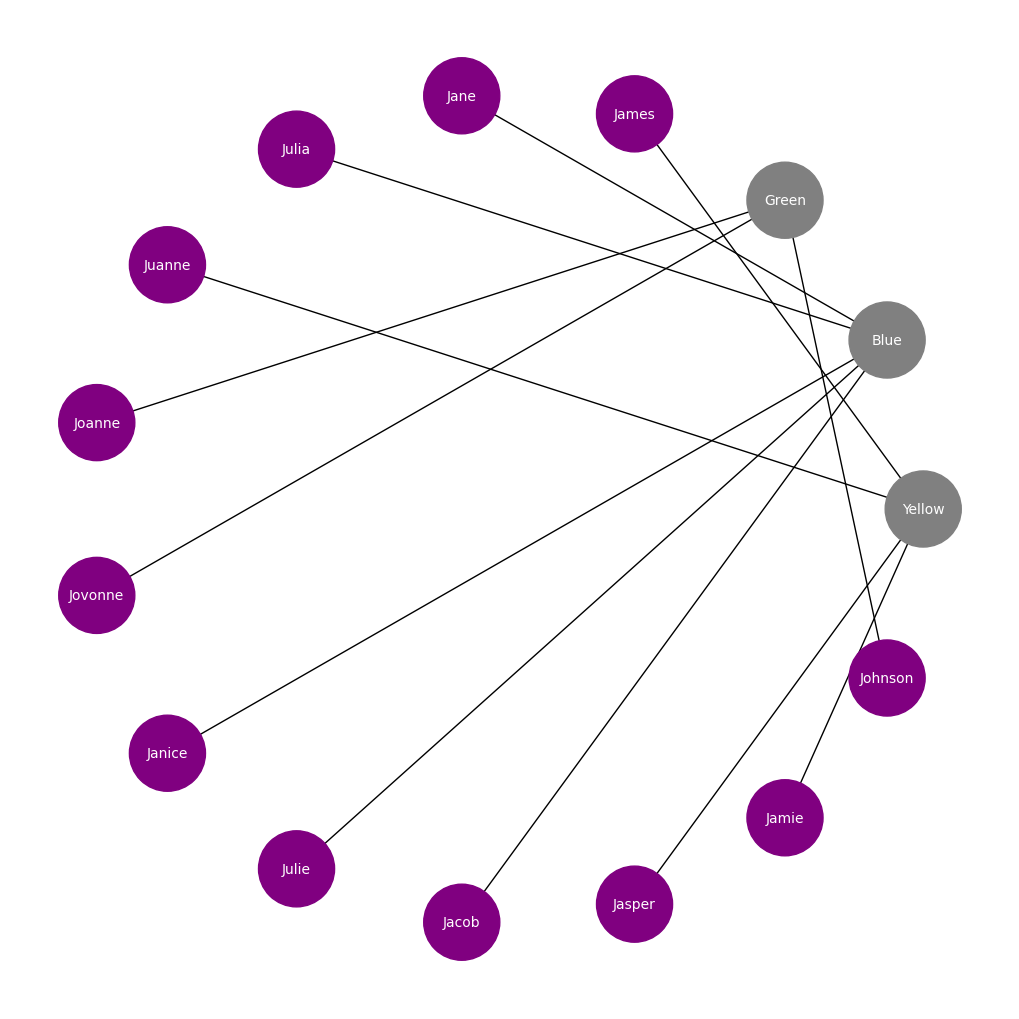

In [98]:
nx.draw(sports, with_labels = True, node_color = ncolors, node_size = 3000, font_size = 10, pos = positions, font_color = "white")

In [99]:
# getting a projected network of fans
# note that we are selecting only the students from all nodes

projection = bipartite.projected_graph(sports, nodes = students)
posit = nx.circular_layout(projection)

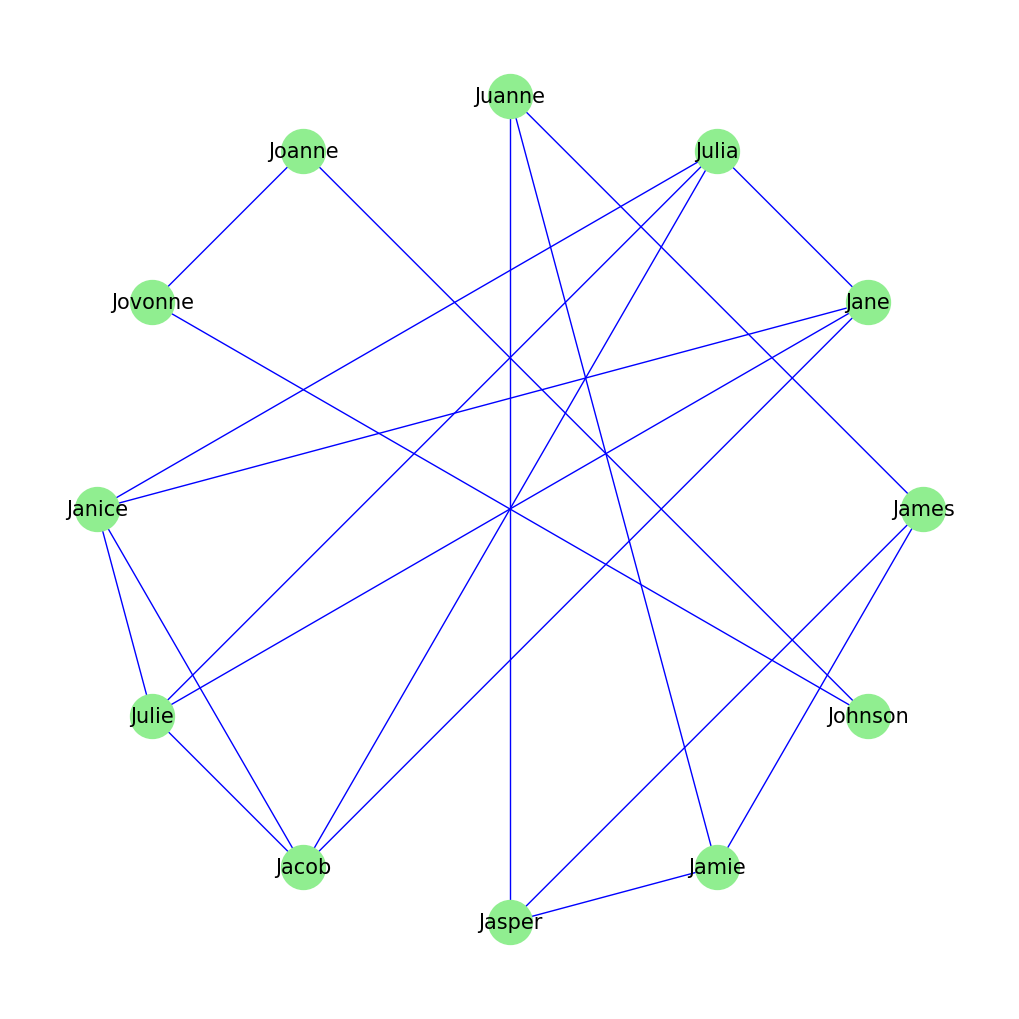

In [100]:
plt.rcParams["figure.figsize"] = 10, 10
nx.draw(projection, with_labels = True, node_color = "lightgreen", node_size = 1000, edge_color = "blue", font_size = 15, pos = posit)
plt.show()

----------------------------

In [108]:
teams = ["Yellow", "Blue", "Green"]
students = ["James", "Jane", "Julia", "Juanne", "Joanne", "Jovonne", "Janice", "Julie", "Jacob", "Jasper", "Jamie", "Johnson"]

sports = nx.Graph()

sports.add_nodes_from(teams, group = "Teams")
sports.add_nodes_from(students, group = "Students")

# students with liked multiple teams
sports.add_edges_from([(student, random.choice(teams)) for student in students * 3])

ncolors = ["lightgreen" if ntype == "Teams" else "lightyellow" for ntype in nx.get_node_attributes(sports, "group").values()]
positions = nx.circular_layout(sports)

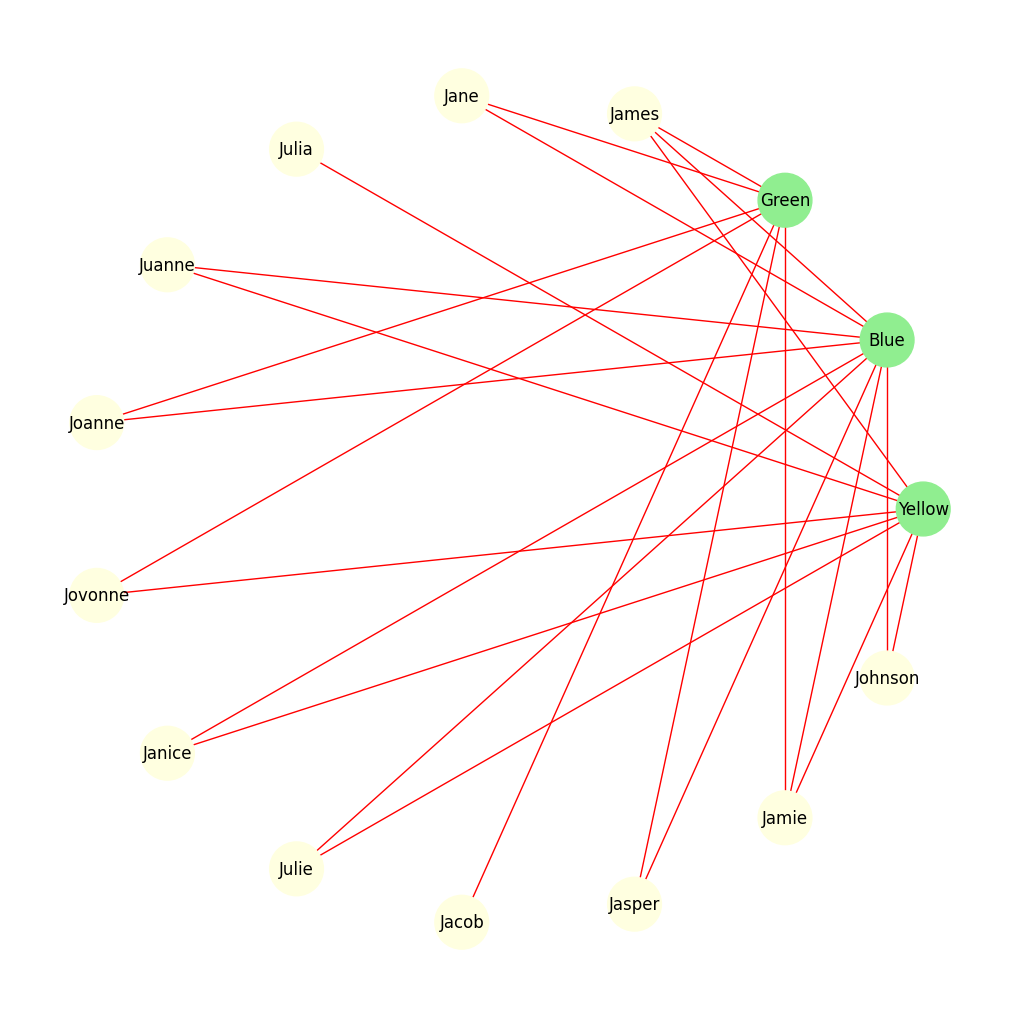

In [112]:
nx.draw(sports, with_labels = True, pos = positions, node_color = ncolors, node_size = 1500, edge_color = "red")

In [113]:
# R projected bipartite graph
# projection of teams with shared fans

_proj = bipartite.projected_graph(sports, nodes = teams)
_posit = nx.circular_layout(_proj)

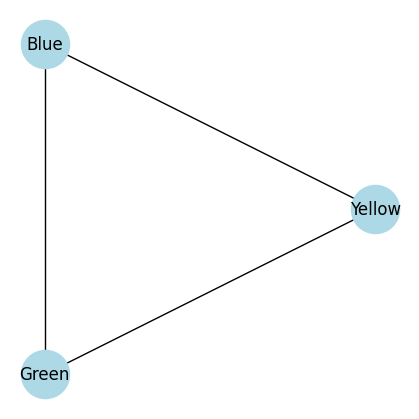

In [119]:
plt.rcParams["figure.figsize"] = 4, 4
nx.draw(_proj, pos = _posit, with_labels = True, node_color = "lightblue", node_size = 1200)
plt.show()

# all teams seems to have at least one fan in common :?

In [120]:
# however the above graph does not show how many fans are shared by a pair of teams
# thus, a weighted bipartite projected graph might be a better choice

weighted_proj = bipartite.weighted_projected_graph(sports, nodes = teams)

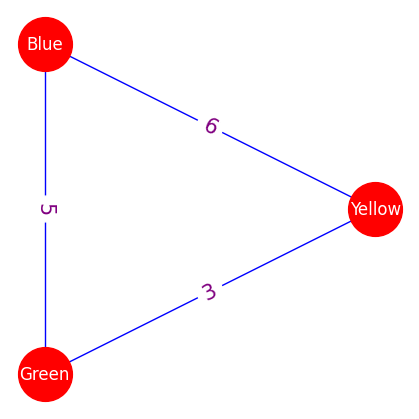

In [141]:
pos = nx.circular_layout(weighted_proj)
nx.draw(weighted_proj, with_labels = True, node_color = "red", node_size = 1500, edge_color = "blue", font_size = 12, pos = pos,
        font_color = "white")
nx.draw_networkx_edge_labels(weighted_proj, pos = pos, font_color = "purple", font_size = 15, 
                             edge_labels = nx.get_edge_attributes(weighted_proj, "weight"))

plt.show()